#### 1. Multilayer Perceptron (MLP)

In [145]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

In [146]:
#Step 2: Load the Dataset
# Load the scaled dataset
data = pd.read_csv('scaled_dataset.csv')
data.head()


,Age,Arrival Service,Booking Services,Immediate Transfer,Lounge Service,Check-in Service,Boarding Service,Layover Service,Onboard Services,Baggage Service,...,Call Center Service,Departure Delay,Total Delay,Arrival Delay_log,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Leisure,Satisfaction_Satisfied
0,1.313639,0.707066,-0.725397,-0.707346,-1.415134,0.710901,-0.724658,1.419690,-0.713449,1.426085,...,-0.000036,-0.512062,-0.535057,0.000000,False,False,False,False,False,True
1,0.375815,1.410824,-1.432411,-0.000954,-0.000071,0.007665,-1.432021,0.007274,-0.004924,1.426085,...,-1.419386,0.655089,0.152076,1.386294,False,False,False,False,False,True
2,0.303675,0.003308,-1.432411,-1.413738,0.707461,0.710901,-0.017295,0.007274,-0.004924,1.426085,...,1.419315,-0.512062,-0.535057,0.000000,True,False,False,True,False,True
3,-0.057027,1.410824,-1.432411,-0.707346,1.414992,-1.398805,0.690068,-0.698934,-0.713449,0.718877,...,1.419315,-0.512062,-0.535057,0.000000,False,False,False,False,False,True
4,0.952937,1.410824,-0.018382,-1.413738,1.414992,-0.695570,0.690068,1.419690,-1.421974,-0.695539,...,-0.709711,-0.512062,-0.535057,0.000000,True,False,False,False,False,True


In [147]:
# Separate features and target
X = data.drop('Satisfaction_Satisfied', axis=1) 
y = data['Satisfaction_Satisfied']  


In [148]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [149]:
# Step 4: Define the MLP Model Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 1 neuron and sigmoid for binary classification
])


In [150]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [151]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=1)


Epoch 1/100


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7457 - loss: 0.5331 - val_accuracy: 0.8303 - val_loss: 0.4073
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8140 - loss: 0.4267 - val_accuracy: 0.8353 - val_loss: 0.3980
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.4017 - val_accuracy: 0.8394 - val_loss: 0.3974
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.3994 - val_accuracy: 0.8347 - val_loss: 0.3967
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8346 - loss: 0.3924 - val_accuracy: 0.8378 - val_loss: 0.3948
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8357 - loss: 0.3887 - val_accuracy: 0.8375 - val_loss: 0.3944
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8337 - loss: 0.3878 - val_accuracy: 0.8381 - val_loss: 0.3929
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8357 - loss: 0.3858 - val_accuracy: 0.8403

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


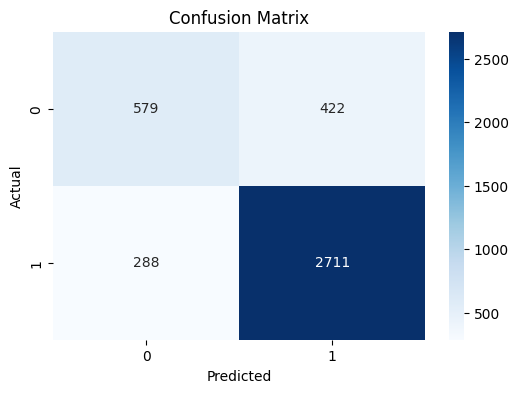

              precision    recall  f1-score   support

       False       0.67      0.58      0.62      1001
        True       0.87      0.90      0.88      2999

    accuracy                           0.82      4000
   macro avg       0.77      0.74      0.75      4000
weighted avg       0.82      0.82      0.82      4000



In [152]:
# Step 7: Evaluate the Model
# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


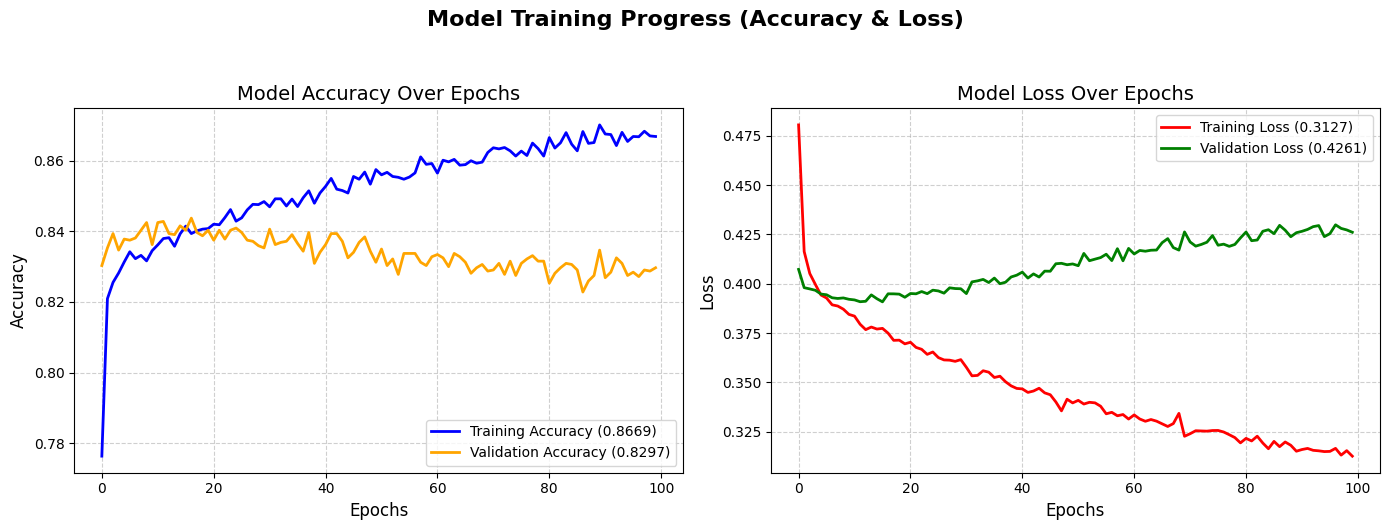

In [154]:
import matplotlib.pyplot as plt

# Plot with improved styling
plt.figure(figsize=(14, 5))

# Adding a common title
plt.suptitle('Model Training Progress (Accuracy & Loss)', fontsize=16, y=1.05, fontweight='bold')

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label=f'Training Accuracy ({history.history["accuracy"][-1]:.4f})', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({history.history["val_accuracy"][-1]:.4f})', color='orange', linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=10)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label=f'Training Loss ({history.history["loss"][-1]:.4f})', color='red', linewidth=2)
plt.plot(history.history['val_loss'], label=f'Validation Loss ({history.history["val_loss"][-1]:.4f})', color='green', linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Model Loss Over Epochs', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


#### MLP + Hyperparameter Tuning with Keras Tuner

In [155]:
# Step 1: Install Keras Tuner (if not already installed)
# pip install keras-tuner

In [156]:
#Step 2: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import keras_tuner as kt

In [ ]:
data = pd.read_csv("scaled_dataset.csv")                      # Load the preprocessed and scaled dataset

X = data.drop("Satisfaction_Satisfied", axis=1)              # Separate features by dropping the target column
y = data["Satisfaction_Satisfied"]                           # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(         # Split data into training and testing sets
    X, y,                                                   # Features and target
    test_size=0.2,                                          # 20% of the data goes to the test set
    random_state=42,                                        # For reproducibility
    stratify=y                                              # Maintain class distribution in train/test sets
)

In [ ]:
# Step 4: Build a Hypermodel Function
def build_model(hp):
    model = keras.Sequential()                                                   # Initialize a Sequential model
    model.add(layers.Input(shape=(X_train.shape[1],)))                           # Input layer matching number of features

    for i in range(hp.Int("num_layers", 1, 3)):                                  # Tune number of hidden layers (1 to 2)
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),  # Tune number of units per layer
                activation=hp.Choice("activation", ["relu", "tanh"])               # Tune activation function
            )
        )
        model.add(
            layers.Dropout(rate=hp.Float("dropout", 0.0, 0.5, step=0.1))           # Tune dropout rate to reduce overfitting
        )

    model.add(layers.Dense(1, activation="sigmoid"))                             # Output layer for binary classification

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")                # Tune learning rate (log scale)
        ),
        loss="binary_crossentropy",                                              # Binary cross-entropy loss for classification
        metrics=["accuracy"]                                                    # Track accuracy during training
    )

    return model                                                                 # Return the compiled model


In [ ]:
# Step 5: Initialize Keras Tuner (RandomSearch / Hyperband)
tuner = kt.RandomSearch(
    build_model,                             # The hypermodel function to build and tune
    objective="val_accuracy",                # Optimize for highest validation accuracy
    max_trials=10,                           # Try up to 10 different hyperparameter combinations
    executions_per_trial=1,                  # Run each model configuration once
    directory="mlp_tuning",                  # Folder to save tuning logs/results
    project_name="mlp_classifier"            # Subdirectory name for this specific tuning project
)


In [ ]:
# Step 6: Run Hyperparameter Search
tuner.search(
    X_train,                      # Training features
    y_train,                      # Training labels
    epochs=100,                   # Maximum number of epochs per trial
    validation_split=0.2,         # Use 20% of training data for validation during tuning
    verbose=1                     # Display training progress (1 = progress bar)
)

Trial 10 Complete [00h 01m 19s]
val_accuracy: 0.8421875238418579

Best val_accuracy So Far: 0.8446875214576721
Total elapsed time: 00h 12m 01s


In [ ]:
# Step 7: Get the Best Model and Evaluate

best_model = tuner.get_best_models(num_models=1)[0]         # Retrieve the best model from the hyperparameter search

y_pred = (best_model.predict(X_test) > 0.5).astype("int32") # Predict on the test set and convert probabilities to binary (0 or 1)

# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))                        # Print confusion matrix for evaluation
print(classification_report(y_test, y_pred))                   # Print detailed classification report (precision, recall, f1-score)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
[[ 625  376]
 [ 284 2715]]
              precision    recall  f1-score   support

       False       0.69      0.62      0.65      1001
        True       0.88      0.91      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.76      0.77      4000
weighted avg       0.83      0.83      0.83      4000



#### Visualize Confusion Matrix

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
[[ 625  376]
 [ 284 2715]]
              precision    recall  f1-score   support

       False       0.69      0.62      0.65      1001
        True       0.88      0.91      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.76      0.77      4000
weighted avg       0.83      0.83      0.83      4000



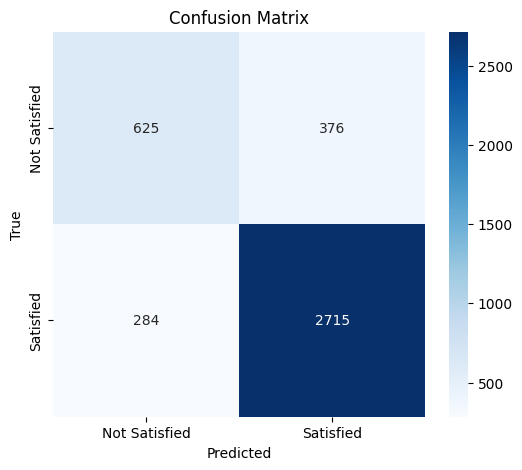

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Step 7: Get the Best Model and Evaluate

best_model = tuner.get_best_models(num_models=1)[0]         # Retrieve the best model from the hyperparameter search

y_pred = (best_model.predict(X_test) > 0.5).astype("int32") # Predict on the test set and convert probabilities to binary (0 or 1)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)  # Generate confusion matrix

# Print the confusion matrix and classification report
print(conf_matrix)                                # Print confusion matrix for evaluation
print(classification_report(y_test, y_pred))      # Print detailed classification report (precision, recall, f1-score)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import pandas as pd                                                # Import pandas for DataFrame manipulation

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]                    # Retrieve the best hyperparameters from the tuner

# Extract and round learning_rate
hp_items = []                                                      # Initialize an empty list to store hyperparameter names and values
for k, v in best_hps.values.items():                                # Iterate through each hyperparameter and value
    if k == "learning_rate":                                        # If the hyperparameter is 'learning_rate'
        v = round(v, 5)                                             # Round the learning rate to 5 decimal places
    hp_items.append((k, v))                                          # Append the hyperparameter name and value to the list

# Create formatted DataFrame
hp_table = pd.DataFrame(hp_items, columns=["Hyperparameter", "Value"])  # Create a DataFrame from the list of hyperparameters

# Print formatted table
print("\n🔧 Best Hyperparameters Found:")                             # Display a message before printing the table
print(hp_table.to_markdown(index=False))                             # Print the table in markdown format (without the index)

# Save best model in modern Keras format
best_model = tuner.get_best_models(num_models=1)[0]                 # Retrieve the best model from the tuner
best_model.save("best_model.keras")                                  # Save the best model in the Keras format



🔧 Best Hyperparameters Found:
| Hyperparameter   | Value   |
|:-----------------|:--------|
| num_layers       | 3       |
| units_0          | 224     |
| activation       | tanh    |
| dropout          | 0.4     |
| learning_rate    | 0.0008  |
| units_1          | 160     |
| units_2          | 32      |


#### Implementation with Specified Hyperparameters

In [57]:
import pandas as pd                                                # Import pandas for DataFrame manipulation
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt

# Load the dataset
data = pd.read_csv("scaled_dataset.csv")                             # Load the preprocessed and scaled dataset

X = data.drop("Satisfaction_Satisfied", axis=1)                      # Separate features by dropping the target column
y = data["Satisfaction_Satisfied"]                                   # Assign the target column to y

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build the hypermodel function
def build_model(hp):
    model = keras.Sequential()                                         # Initialize a Sequential model
    model.add(layers.Input(shape=(X_train.shape[1],)))                 # Input layer matching number of features

    # Add hidden layers as per hyperparameters
    for i in range(hp.Int("num_layers", 1, 3)):                        # Loop to add hidden layers (1 to 3)
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),  # Specify units for each layer
                activation=hp.Choice("activation", ["relu", "tanh"])               # Activation function choice
            )
        )
        model.add(
            layers.Dropout(rate=hp.Float("dropout", 0.0, 0.5, step=0.1))             # Dropout for regularization
        )

    model.add(layers.Dense(1, activation="sigmoid"))                     # Output layer for binary classification

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")                # Learning rate tuning
        ),
        loss="binary_crossentropy",                                          # Binary cross-entropy loss
        metrics=["accuracy"]                                                # Track accuracy during training
    )

    return model                                                            # Return the compiled model

# Initialize Keras Tuner with RandomSearch for hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,                                                           # Use the build_model function
    objective="val_accuracy",                                               # Optimize for validation accuracy
    max_trials=10,                                                          # Max number of hyperparameter trials
    executions_per_trial=1,                                                 # Run each trial once
    directory="mlp_tuning",                                                 # Directory to store tuning logs
    project_name="mlp_classifier"                                           # Project name
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)   # Start the hyperparameter search

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]                            # Get the best hyperparameters

# Use the specified hyperparameters directly
best_hps.values = {
    "num_layers": 3,                                                       # Set the number of layers to 3
    "units_0": 224,                                                         # Set units for first layer
    "activation": "tanh",                                                   # Set activation function to 'tanh'
    "dropout": 0.4,                                                         # Set dropout rate to 0.4
    "learning_rate": 0.0008,                                                # Set learning rate
    "units_1": 160,                                                         # Set units for second layer
    "units_2": 32                                                           # Set units for third layer
}

# Build the best model using the specified hyperparameters
best_model = build_model(best_hps)                                         # Build the model with best hyperparameters

# Train the best model
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)  # Train the model

# Make predictions
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")                # Predict on the test set

# Save the best model in modern Keras format
best_model.save("best_model.keras")                                         # Save the best model


Reloading Tuner from mlp_tuning\mlp_classifier\tuner0.json
Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7220 - loss: 0.5589 - val_accuracy: 0.8359 - val_loss: 0.4058
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7968 - loss: 0.4561 - val_accuracy: 0.8397 - val_loss: 0.4009
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8159 - loss: 0.4301 - val_accuracy: 0.8372 - val_loss: 0.4034
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.4263 - val_accuracy: 0.8397 - val_loss: 0.3962
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.4083 - val_accuracy: 0.8394 - val_loss: 0.3999
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8271 - loss: 0.4066 - val_accuracy: 0.8372 - val_loss: 0.3940
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8220 - loss: 0.4077 - val_accuracy: 0.8391 - val_loss: 0.3952
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━

#### Visualize the confusion matrix as a heatmap

[[ 649  352]
 [ 316 2683]]
              precision    recall  f1-score   support

       False       0.67      0.65      0.66      1001
        True       0.88      0.89      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.83      0.83      0.83      4000



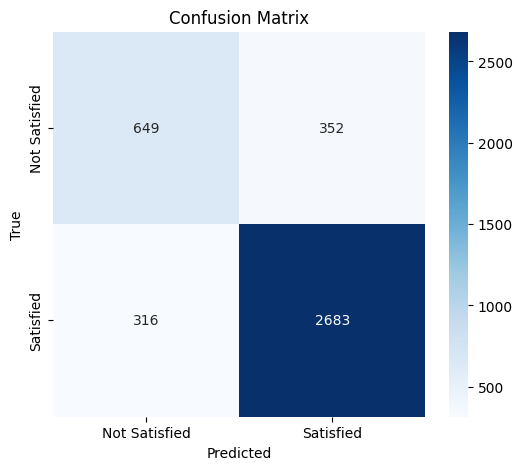

In [56]:
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))                                    # Print confusion matrix for evaluation
print(classification_report(y_test, y_pred))                               # Print detailed classification report

# Visualize the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)                             # Generate confusion matrix
plt.figure(figsize=(6, 5))                                                 # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])  # Plot heatmap
plt.title("Confusion Matrix")                                              # Set title
plt.xlabel("Predicted")                                                    # Set x-axis label
plt.ylabel("True")                                                         # Set y-axis label
plt.show()                                                                 # Display the plot

#### Visualize Training and Testing Accuracy

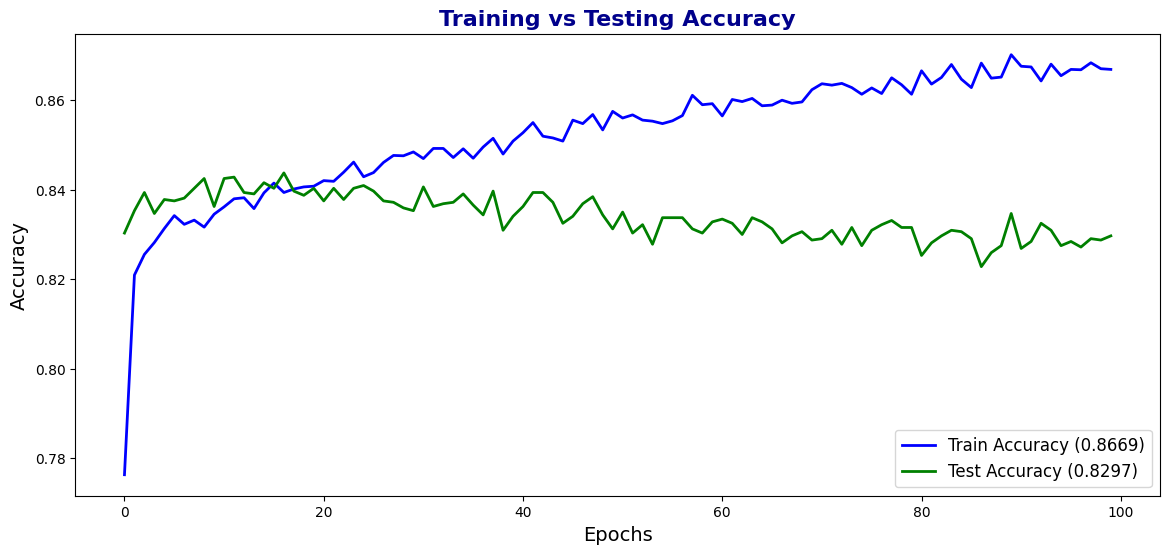

In [157]:
import matplotlib.pyplot as plt

# Step 8: Visualize Training and Testing Accuracy
# Visualize Training and Testing Accuracy over Epochs
plt.figure(figsize=(14, 6))

# Plot for Training Accuracy
train_accuracy = history.history['accuracy'][-1]  # Last training accuracy value
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy value

# Plot training accuracy
plt.plot(history.history['accuracy'], label=f'Train Accuracy ({train_accuracy:.4f})', color='blue', linewidth=2)
# Plot testing accuracy
plt.plot(history.history['val_accuracy'], label=f'Test Accuracy ({val_accuracy:.4f})', color='green', linewidth=2)

# Title with formatting
plt.title('Training vs Testing Accuracy', fontsize=16, fontweight='bold', color='darkblue')

# Labeling the axes
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Add a legend with the values
plt.legend(loc='lower right', fontsize=12)

# Display the plot
plt.show()


#### Visualize the training history for accuracy and loss

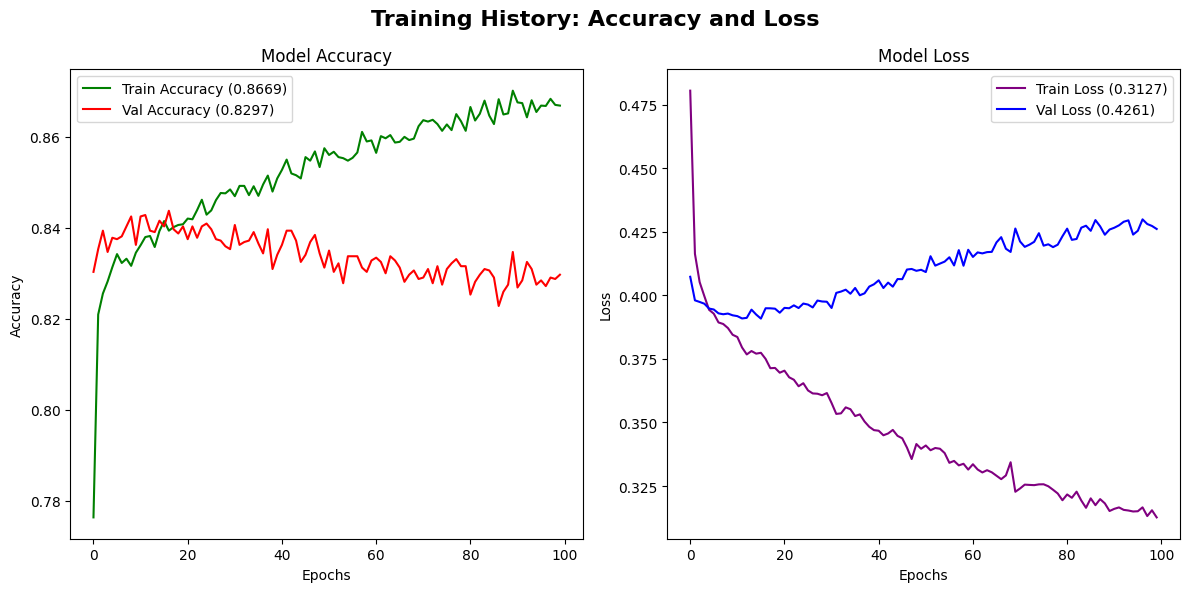

In [159]:
import matplotlib.pyplot as plt

# Visualize the training history for accuracy and loss

# Step 1: Plot Accuracy over Epochs
plt.figure(figsize=(12, 6))

# Subplot for Accuracy
train_accuracy = history.history['accuracy'][-1]  # Last training accuracy value
val_accuracy = history.history['val_accuracy'][-1]  # Last validation accuracy value
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
plt.plot(history.history['accuracy'], label=f'Train Accuracy ({train_accuracy:.4f})', color='green')  # Using green for training accuracy
plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({val_accuracy:.4f})', color='red')  # Using red for validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Step 2: Plot Loss over Epochs
train_loss = history.history['loss'][-1]  # Last training loss value
val_loss = history.history['val_loss'][-1]  # Last validation loss value
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd plot)
plt.plot(history.history['loss'], label=f'Train Loss ({train_loss:.4f})', color='purple')  # Using purple for training loss
plt.plot(history.history['val_loss'], label=f'Val Loss ({val_loss:.4f})', color='blue')  # Using yellow for validation loss
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Common title for both subplots
plt.suptitle('Training History: Accuracy and Loss', fontsize=16, fontweight='bold')

# Layout adjustment for better spacing between plots
plt.tight_layout()

# Display the plots
plt.show()


#### 2. TabNet

In [ ]:
#Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Step 2: Load and Prepare the Data
# Load data: Read the CSV file into a Pandas DataFrame
data = pd.read_csv("scaled_dataset.csv")

# Features and target:
# X contains all the columns except the target variable "Satisfaction_Satisfied"
# y contains the target variable "Satisfaction_Satisfied"
X = data.drop("Satisfaction_Satisfied", axis=1).values  # Features (all columns except target)
y = data["Satisfaction_Satisfied"].values  # Target variable (customer satisfaction)

# Train-test split:
# Split the dataset into training and testing sets (80% training, 20% testing)
# Stratified split ensures that the proportion of each class in y is maintained in both the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # 20% test, 80% train, and stratify based on target labels
)

In [92]:
# Import necessary libraries
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import pandas as pd

# Safely convert to numpy arrays if still DataFrame/Series
# This function ensures that the input data (X or y) is converted to numpy arrays (if they are still pandas DataFrame/Series).
# It also allows specifying the dtype for the conversion, for example, np.float32 or np.int64.
def ensure_numpy(X, dtype=None):
    if isinstance(X, (pd.DataFrame, pd.Series)):
        return X.to_numpy(dtype=dtype)  # Convert DataFrame/Series to numpy array
    return X.astype(dtype) if dtype else X  # Return numpy array with specified dtype if needed

# Convert training and testing data to numpy arrays with appropriate data types
X_train_np = ensure_numpy(X_train, np.float32)  # Features for training (convert to float32)
X_test_np = ensure_numpy(X_test, np.float32)    # Features for testing (convert to float32)
y_train_np = ensure_numpy(y_train, np.int64).flatten()  # Target for training (convert to int64 and flatten)
y_test_np = ensure_numpy(y_test, np.int64).flatten()    # Target for testing (convert to int64 and flatten)

# Train TabNet model
# Instantiate the TabNetClassifier model, specifying 'auto' for device_name to use the available device (CPU/GPU).
tabnet_model = TabNetClassifier(device_name='auto')

# Fit the model using the training data (X_train_np, y_train_np) and evaluate on the test data (X_test_np, y_test_np).
tabnet_model.fit(
    X_train_np, y_train_np,  # Training data and labels
    eval_set=[(X_test_np, y_test_np)],  # Evaluation data and labels
    eval_name=["val"],  # Evaluation set name
    eval_metric=["accuracy"],  # Metric to monitor for evaluation (accuracy)
    max_epochs=100,  # Maximum number of epochs for training
    patience=10,  # Early stopping patience (number of epochs with no improvement)
    batch_size=1024,  # Batch size for training
    virtual_batch_size=128,  # Virtual batch size for training (for gradient accumulation)
    num_workers=0,  # Number of workers for data loading (use 0 for no parallelism)
    drop_last=False  # Don't drop the last batch if it's smaller than batch_size
)

epoch 0  | loss: 0.58633 | val_accuracy: 0.75025 |  0:00:00s
epoch 1  | loss: 0.46527 | val_accuracy: 0.79825 |  0:00:01s
epoch 2  | loss: 0.42847 | val_accuracy: 0.81    |  0:00:03s
epoch 3  | loss: 0.41606 | val_accuracy: 0.81225 |  0:00:03s
epoch 4  | loss: 0.41054 | val_accuracy: 0.81875 |  0:00:04s
epoch 5  | loss: 0.40668 | val_accuracy: 0.82225 |  0:00:05s
epoch 6  | loss: 0.40458 | val_accuracy: 0.82525 |  0:00:06s
epoch 7  | loss: 0.40167 | val_accuracy: 0.8305  |  0:00:07s
epoch 8  | loss: 0.398   | val_accuracy: 0.828   |  0:00:08s
epoch 9  | loss: 0.39707 | val_accuracy: 0.826   |  0:00:09s
epoch 10 | loss: 0.3962  | val_accuracy: 0.82675 |  0:00:10s
epoch 11 | loss: 0.39443 | val_accuracy: 0.83175 |  0:00:11s
epoch 12 | loss: 0.39508 | val_accuracy: 0.82875 |  0:00:12s
epoch 13 | loss: 0.39489 | val_accuracy: 0.831   |  0:00:13s
epoch 14 | loss: 0.39397 | val_accuracy: 0.83125 |  0:00:14s
epoch 15 | loss: 0.39315 | val_accuracy: 0.83125 |  0:00:15s
epoch 16 | loss: 0.39438


Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.64      0.66      1001
        True       0.88      0.90      0.89      2999

    accuracy                           0.83      4000
   macro avg       0.78      0.77      0.77      4000
weighted avg       0.83      0.83      0.83      4000



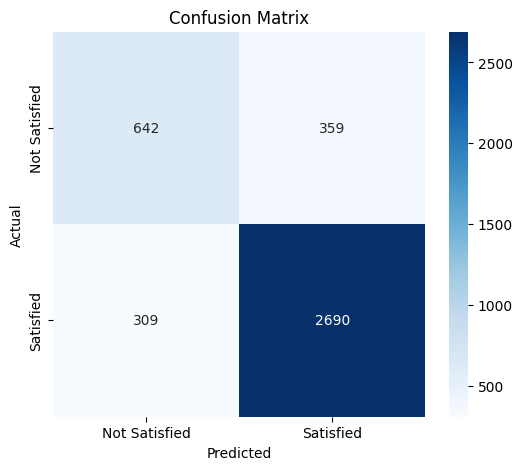

In [93]:
# Import necessary libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix  # For generating classification report and confusion matrix
import seaborn as sns  # For creating heatmaps
import matplotlib.pyplot as plt  # For plotting the confusion matrix

# Ensure X_test is a NumPy array of correct dtype
# Convert X_test to a numpy array with dtype np.float32, if it is a pandas DataFrame
# Otherwise, convert it to np.float32 using .astype method
X_test_np = X_test.to_numpy(dtype=np.float32) if hasattr(X_test, "to_numpy") else X_test.astype(np.float32)

# Predict using the trained TabNet model
# Use the trained model to predict the labels of the test data (X_test_np)
y_pred = tabnet_model.predict(X_test_np)

# Classification Report
# Print the classification report, showing various metrics like precision, recall, f1-score, etc.
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
# Compute the confusion matrix by comparing the true labels (y_test) with predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))  # Set the size of the figure
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  # Generate the heatmap
            xticklabels=["Not Satisfied", "Satisfied"],  # Set the x-axis labels
            yticklabels=["Not Satisfied", "Satisfied"])  # Set the y-axis labels
plt.title("Confusion Matrix")  # Set the title of the plot
plt.xlabel("Predicted")  # Set x-axis label
plt.ylabel("Actual")  # Set y-axis label
plt.show()  # Display the plot


#### Step 5:Visualize Training History

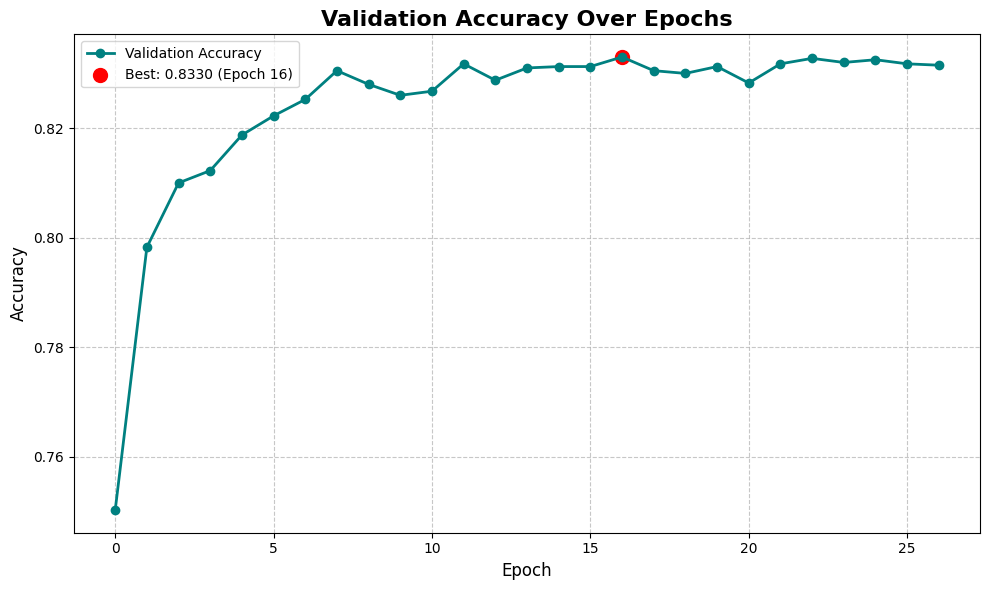

Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

In [73]:
import matplotlib.pyplot as plt

# Extract accuracy history
val_accuracy = tabnet_model.history["val_accuracy"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(val_accuracy, marker='o', linestyle='-', color='teal', linewidth=2, label='Validation Accuracy')

# Highlight best accuracy
best_epoch = np.argmax(val_accuracy)
best_acc = val_accuracy[best_epoch]
plt.scatter(best_epoch, best_acc, color='red', s=100, label=f'Best: {best_acc:.4f} (Epoch {best_epoch})')

# Add labels, title and legend
plt.title("Validation Accuracy Over Epochs", fontsize=16, fontweight='bold')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
# Save the trained TabNet model
tabnet_model.save_model("tabnet_model")  # Save the model to a file

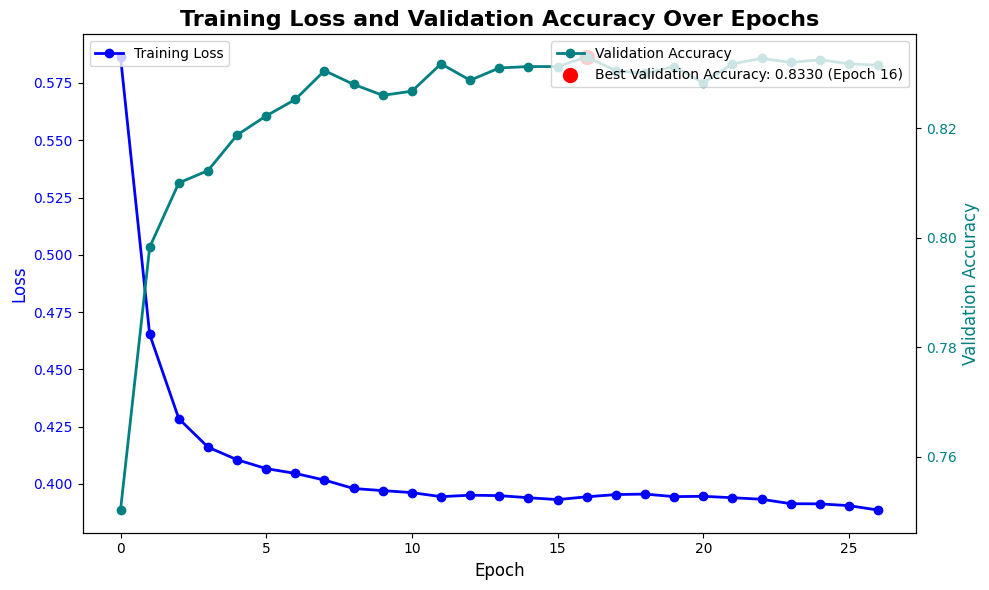

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract loss and validation accuracy history
train_loss = tabnet_model.history["loss"]  # Training loss
val_accuracy = tabnet_model.history["val_accuracy"]  # Validation accuracy (Testing accuracy)

# Step 2: Create the plot for loss and validation accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot training loss (using the primary axis)
ax1.set_xlabel("Epoch", fontsize=12)
ax1.set_ylabel("Loss", fontsize=12, color='blue')
ax1.plot(train_loss, marker='o', linestyle='-', color='blue', linewidth=2, label='Training Loss')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis to plot validation accuracy
ax2 = ax1.twinx()  # Create a second y-axis
ax2.set_ylabel("Validation Accuracy", fontsize=12, color='teal')
ax2.plot(val_accuracy, marker='o', linestyle='-', color='teal', linewidth=2, label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor='teal')

# Highlight best validation accuracy
best_epoch = np.argmax(val_accuracy)
best_acc = val_accuracy[best_epoch]
ax2.scatter(best_epoch, best_acc, color='red', s=100, label=f'Best Validation Accuracy: {best_acc:.4f} (Epoch {best_epoch})')

# Step 3: Add title and legend
plt.title("Training Loss and Validation Accuracy Over Epochs", fontsize=16, fontweight='bold')
fig.tight_layout()  # To ensure the layout is adjusted

# Show both legends for loss and accuracy
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Step 4: Show the plot
plt.show()


#### 3. DCN Implementation Using Keras

In [121]:
import tensorflow as tf
from tensorflow.keras import layers, models

class DeepCrossNetwork(models.Model):
    def __init__(self, input_dim, deep_layers, cross_layers):
        super(DeepCrossNetwork, self).__init__()
        
        # Deep layers
        self.deep_layers = []
        for units in deep_layers:
            self.deep_layers.append(layers.Dense(units, activation='relu'))
        
        # Cross layers
        self.cross_layers = [layers.Dense(1, activation='sigmoid') for _ in range(cross_layers)]

        # Final output layer
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = inputs
        # Apply deep layers
        for layer in self.deep_layers:
            x = layer(x)
        
        # Apply cross layers
        for cross_layer in self.cross_layers:
            x = cross_layer(x)
        
        # Apply the final output layer
        output = self.output_layer(x)
        return output

# Step 1: Ensure data is numeric
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)  # Assuming binary labels (0 or 1)
y_test = np.array(y_test, dtype=np.int32)    # Assuming binary labels (0 or 1)

# Step 2: Check for missing values
assert not np.any(np.isnan(X_train)), "X_train contains NaN values"
assert not np.any(np.isnan(X_test)), "X_test contains NaN values"
assert not np.any(np.isnan(y_train)), "y_train contains NaN values"
assert not np.any(np.isnan(y_test)), "y_test contains NaN values"

# Step 3: Define and compile the DCN model
dcn_model = DeepCrossNetwork(input_dim=X_train.shape[1], deep_layers=[128, 64], cross_layers=3)
dcn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = dcn_model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
test_loss, test_accuracy = dcn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2500 - loss: 0.7265 - val_accuracy: 0.2503 - val_loss: 0.7212
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2501 - loss: 0.7195 - val_accuracy: 0.2503 - val_loss: 0.7145
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2512 - loss: 0.7128 - val_accuracy: 0.2503 - val_loss: 0.7082
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2461 - loss: 0.7069 - val_accuracy: 0.2503 - val_loss: 0.7022
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2530 - loss: 0.7007 - val_accuracy: 0.2503 - val_loss: 0.6965
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3000 - loss: 0.6951 - val_accuracy: 0.7498 - val_loss: 0.6910
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7537 - loss: 0.6896 - val_accuracy: 0.7498 - val_loss: 0.6857
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7440 - loss: 0.6846 - val_accuracy: 0.7498 - 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


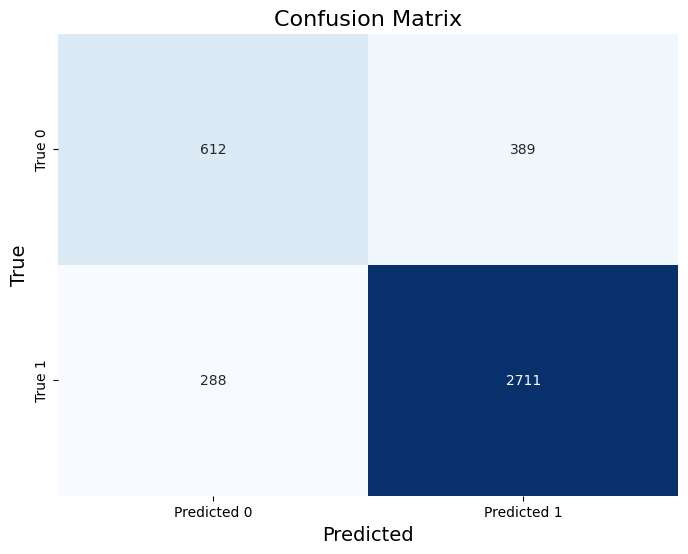

In [139]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Predict using the best model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Step 2: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()


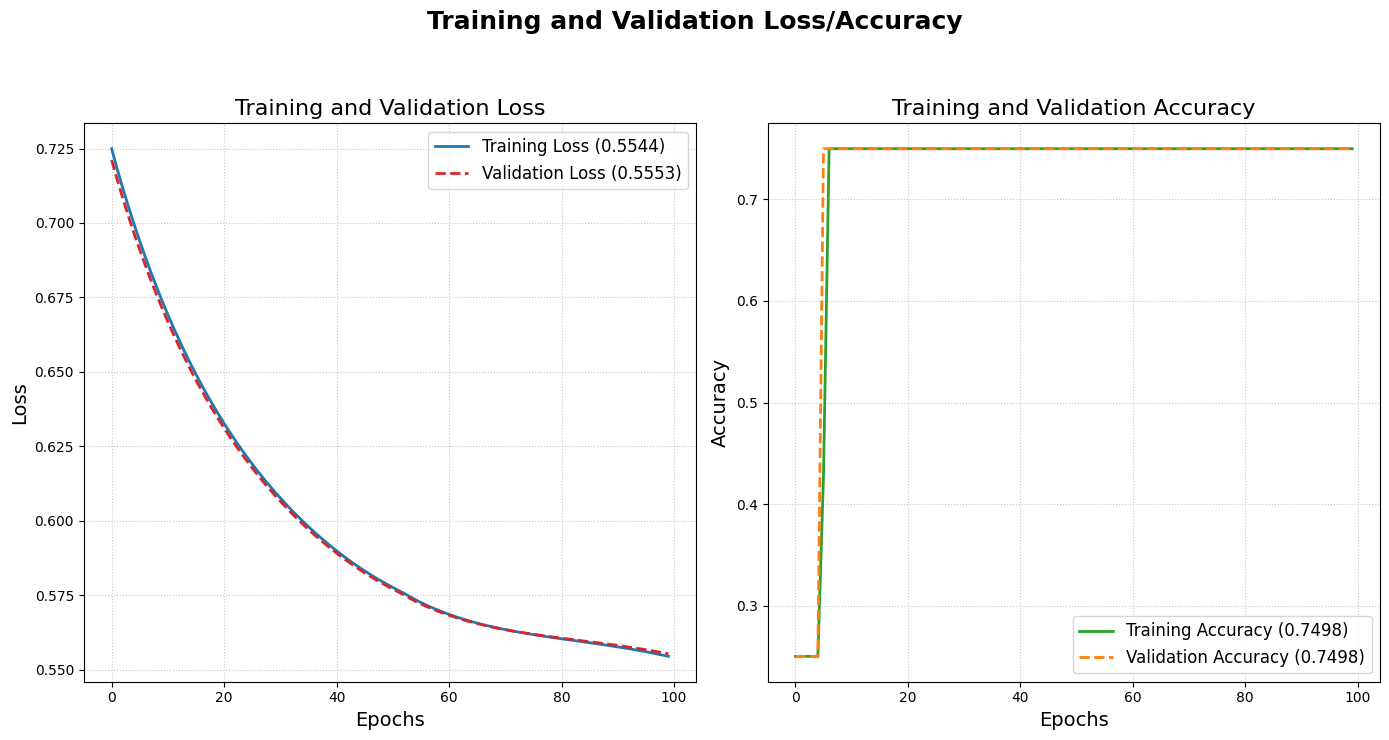

In [138]:
import matplotlib.pyplot as plt

# Step 6: Plot training and validation loss/accuracy
plt.figure(figsize=(14, 7))

# Adding a common title
plt.suptitle('Training and Validation Loss/Accuracy', fontsize=18, y=1.05, fontweight='bold')

# Plotting the loss
plt.subplot(1, 2, 1)
train_loss_line, = plt.plot(history.history['loss'], label=f'Training Loss ({history.history["loss"][-1]:.4f})', color='tab:blue', linewidth=2)
val_loss_line, = plt.plot(history.history['val_loss'], label=f'Validation Loss ({history.history["val_loss"][-1]:.4f})', color='tab:red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

# Plotting the accuracy
plt.subplot(1, 2, 2)
train_acc_line, = plt.plot(history.history['accuracy'], label=f'Training Accuracy ({history.history["accuracy"][-1]:.4f})', color='tab:green', linewidth=2)
val_acc_line, = plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({history.history["val_accuracy"][-1]:.4f})', color='tab:orange', linestyle='--', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()
